In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gb
import plotly.express as ex
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
Data=pd.read_csv("/content/housing_price_dataset1.csv")
Data.head()

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126       4.0          1        Rural       1969  215355.283618
1        2459       3.0          2        Rural       1980  195014.221626
2        1860       2.0          1       Suburb       1970  306891.012076
3        2294       2.0          1        Urban       1996  206786.787153
4        2130       5.0          2       Suburb       2001  272436.239100

In [ ]:
fig=ex.scatter(data_frame=Data,x="SquareFeet",y="Price",color="Neighborhood",size="YearBuilt",trendline="ols")
fig.show()

In [ ]:
fig=ex.pie(Data,values="Price",names="Neighborhood")
fig.show()

In [ ]:
Data.head()

SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126       4.0          1        Rural       1969  215355.283618
1        2459       3.0          2        Rural       1980  195014.221626
2        1860       2.0          1       Suburb       1970  306891.012076
3        2294       2.0          1        Urban       1996  206786.787153
4        2130       5.0          2       Suburb       2001  272436.239100

In [ ]:
Data.isnull().sum()

SquareFeet      0
Bedrooms        8
Bathrooms       0
Neighborhood    8
YearBuilt       0
Price           0
dtype: int64

In [ ]:
# Impute a numerical missing value
Data['Bedrooms'].fillna(Data['Bedrooms'].mean(), inplace=True)

# Impute a categorical missing value
Data['Neighborhood'].fillna(Data['Neighborhood'].mode()[0], inplace=True)


In [ ]:
Data.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
Data["Neighborhood"].value_counts()
Data["Neighborhood"]=Data["Neighborhood"].map({"Suburb":0,"Rural" :1,"Urban":2}).astype(int)

In [ ]:
Data.head()

SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0        2126       4.0          1             1       1969  215355.283618
1        2459       3.0          2             1       1980  195014.221626
2        1860       2.0          1             0       1970  306891.012076
3        2294       2.0          1             2       1996  206786.787153
4        2130       5.0          2             0       2001  272436.239100

In [ ]:
Data.Neighborhood.value_counts()

0    16727
1    16673
2    16600
Name: Neighborhood, dtype: int64

In [ ]:
X=Data.iloc[:,:-1]
y=Data.iloc[:,-1]

In [ ]:
import numpy as np

# Assuming you have your feature matrix X and target variable y

# Step 1: Calculate the IQR for each feature
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1

# Step 2: Set a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Step 3: Find the indices of the outliers
outlier_indices = []
for i in range(X.shape[1]):
    lower_bound = Q1[i] - threshold * IQR[i]
    upper_bound = Q3[i] + threshold * IQR[i]
    outliers = np.where((X.iloc[:, i] < lower_bound) | (X.iloc[:, i] > upper_bound))[0]
    outlier_indices.extend(outliers)

outlier_indices = np.unique(outlier_indices)

# Step 4: Remove the outliers from the dataset
X_clean = X.drop(outlier_indices)
y_clean = y.drop(outlier_indices)

# Print the number of outliers and the shape of the cleaned dataset
print("Number of outliers detected:", len(outlier_indices))
print("Shape of the cleaned dataset:", X_clean.shape, y_clean.shape)


Number of outliers detected: 0
Shape of the cleaned dataset: (50000, 5) (50000,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling all the variables using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling all the variables using MinMaxScaler
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Make predictions on the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Test MSE: 2436316323.0336037
Test MAE: 39430.464032652286
Test RMSE: 49359.055127034226
Test R2: 0.5755511988722201


In [ ]:
# Create DataFrames for training and testing datasets
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), 'Dataset': 'Training'})
test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), 'Dataset': 'Testing'})

# Concatenate both DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

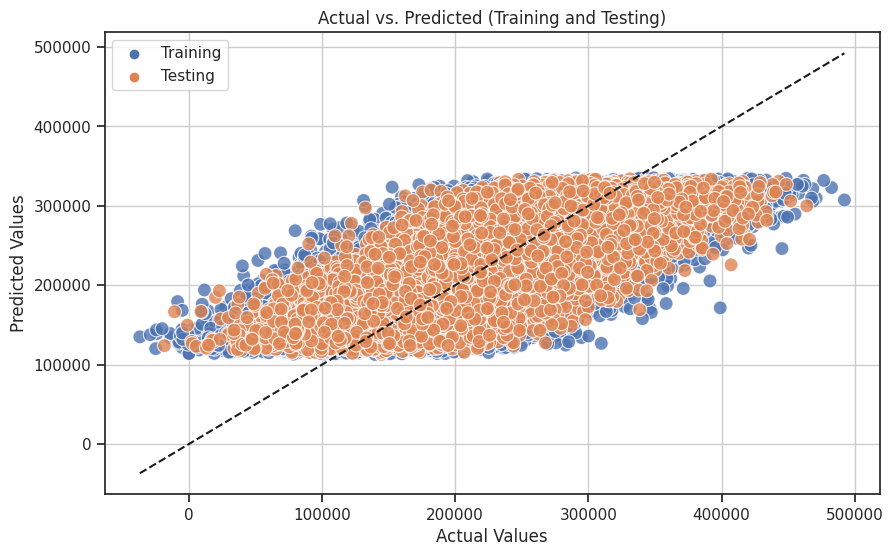

In [ ]:
# Plot the results using Seaborn
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Specify the alpha value for regularization
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_r2 = r2_score(y_test, ridge_test_pred)

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # Specify the alpha value for regularization
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_r2 = r2_score(y_test, lasso_test_pred)

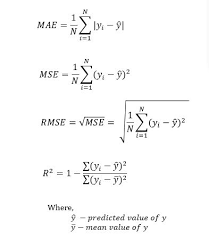

In [ ]:
# Print the metrics
print("Ridge Regression:")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)
print("\nLasso Regression:")
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

Ridge Regression:
MSE: 2436315995.311649
R2 Score: 0.5755512559671012

Lasso Regression:
MSE: 2436315393.4087677
R2 Score: 0.5755513608290823


In [ ]:
# Print the metrics
print("Linear Regression:")
print("MSE:", test_mse)
print("R2 Score:", test_r2)

print("\nRidge Regression:")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)

print("\nLasso Regression:")
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

Linear Regression:
MSE: 2436316323.0336037
R2 Score: 0.5755511988722201

Ridge Regression:
MSE: 2436315995.311649
R2 Score: 0.5755512559671012

Lasso Regression:
MSE: 2436315393.4087677
R2 Score: 0.5755513608290823
